In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../../Data/placement_or_not.csv")
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# Finding Outlier

In [3]:
highest_allowed_marks = df['placement_exam_marks'].quantile(0.99) 
lowest_allowed_marks = df['placement_exam_marks'].quantile(0.01) 

In [4]:
df[(df['placement_exam_marks'] > highest_allowed_marks) | (df['placement_exam_marks'] < lowest_allowed_marks) ]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
74,6.16,3.0,1
117,7.11,0.0,1
134,6.33,93.0,0
162,7.80,90.0,0
219,5.48,3.0,0
324,6.64,90.0,0
630,6.56,96.0,1
701,6.74,2.0,1
730,6.14,90.0,1


In [5]:
# change in shape
print("Before:",df.shape)
print("After:",df[(df['placement_exam_marks'] <= highest_allowed_marks) & (df['placement_exam_marks'] >= lowest_allowed_marks) ].shape)

Before: (1000, 3)
After: (986, 3)


# way-1: Trim outlier

In [6]:
df_trim = df[(df['placement_exam_marks'] <= highest_allowed_marks) & (df['placement_exam_marks'] >= lowest_allowed_marks) ]
df_trim

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# way-2: Cap outlier

In [7]:
df_cap = df.copy()
df_cap['placement_exam_marks'] = np.where(
    df['placement_exam_marks'] > highest_allowed_marks,
    highest_allowed_marks,
    np.where(
        df['placement_exam_marks'] < lowest_allowed_marks,
        lowest_allowed_marks,
        df['placement_exam_marks']
    )
)
df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [8]:
df_cap[(df_cap['placement_exam_marks'] > highest_allowed_marks) | (df_cap['placement_exam_marks'] < lowest_allowed_marks) ]

,cgpa,placement_exam_marks,placed


C:\Users\Jehan\AppData\Local\Temp\ipykernel_2584\2832591866.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\Jehan\AppData\Local\Temp\ipykernel_2584\2832591866.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim['placement_exam_marks'])
C:\Users\Je

Text(0.5, 1.0, 'After Capping')

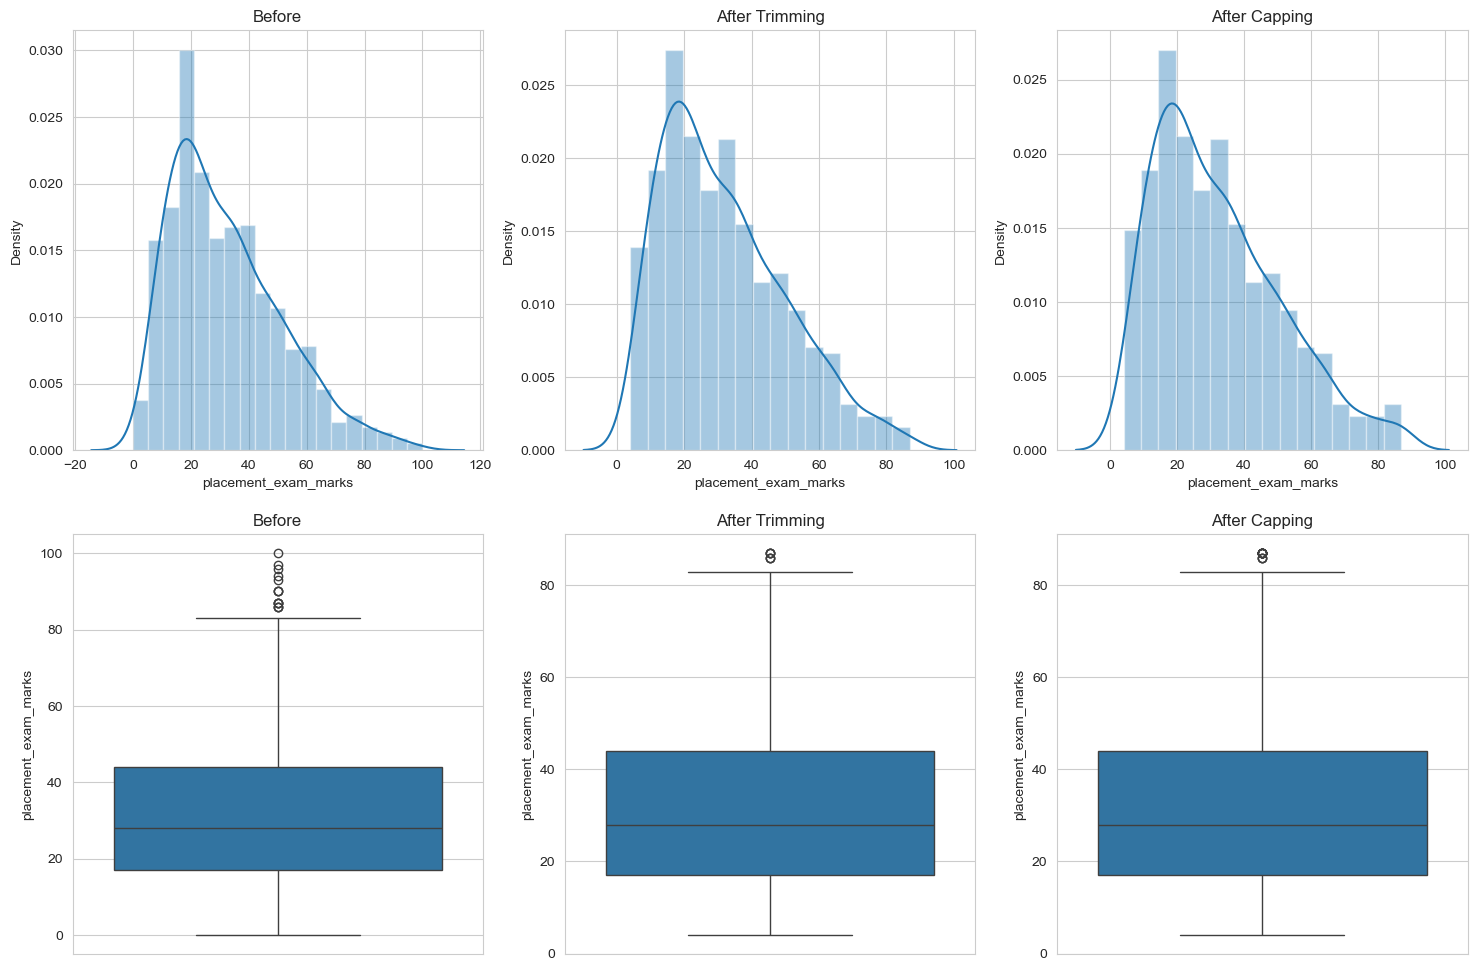

In [9]:
plt.figure(figsize=(18,12))

plt.subplot(231)
sns.distplot(df['placement_exam_marks'])
plt.title("Before")

plt.subplot(232)
sns.distplot(df_trim['placement_exam_marks'])
plt.title("After Trimming")

plt.subplot(233)
sns.distplot(df_cap['placement_exam_marks'])
plt.title("After Capping")

plt.subplot(234)
sns.boxplot(df['placement_exam_marks'])
plt.title("Before")

plt.subplot(235)
sns.boxplot(df_trim['placement_exam_marks'])
plt.title("After Trimming")

plt.subplot(236)
sns.boxplot(df_cap['placement_exam_marks'])
plt.title("After Capping")

